In [1]:
# setup
from helpers.normal import *
import helpers.plotting as pt
import numpy as np
import pandas as pd
import scipy.stats as stats
pt.enable_slide_theme()
pt.import_lato_font_in_notebook()

# How make a decision, if the means of two samples are significantly different?

We collect observations for a normal distributed variable from a population. The population distribution parameter are in real experiments unknown, however, in our example we know the true mean of 100 and the true standard deviation of 20. This gives us the possibility to compare our sample estimates with the population parameters.

In [2]:
seed = np.random.seed(12321)

For a variable of interest we collect 20 observations repeated in 30 experiments

In [3]:
# population parameter 
## population
means = [100, 110]
std = 20 
n_observations = 30
n_samples = 100
n_populations = len(means)

In [4]:
df = normal_dist_df(means, std, n_observations, n_samples)
data = pt.df_to_datasource(df)

In [6]:
data_exp1 = df.loc[(df['population'] == 1)]
data_exp1_semp1 = data_exp1.loc[(data_exp1['sample'] == 1)]

data_exp2 = df.loc[(df['population'] == 2)]
data_exp2_semp1 = data_exp2.loc[(data_exp2['sample'] == 1)]

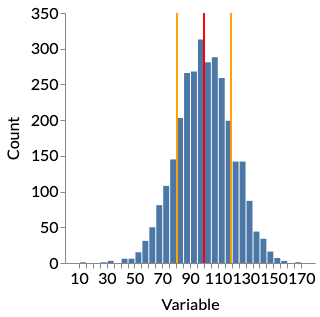

In [7]:
plot_normal_n_populations(data, n_populations)

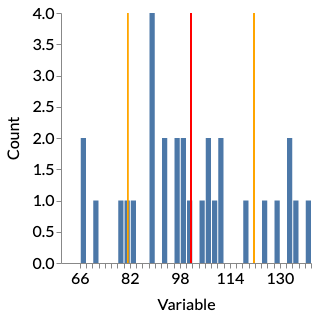

In [8]:
plot_normal_sample(data, n_populations, n_samples)

## Mean and variance for all experiments

### Mean and standard deviation from the sample means

In [9]:
exp1_samp_means = pd.DataFrame(data_exp1.groupby('sample')['variable'].mean())

exp1_samp_means_mean_hat = exp1_samp_means['variable'].mean()
exp1_samp_means_sd_hat = exp1_samp_means['variable'].std()

exp1_samp_means_mean_hat, exp1_samp_means_sd_hat 


(100.17020767813209, 3.475954613428187)

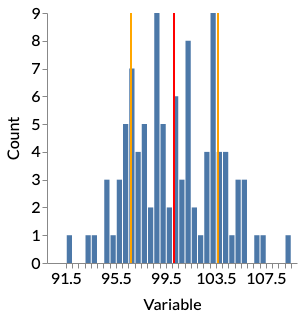

In [10]:
plot_normal(exp1_samp_means)

## The standard deviation of the means can be derived differently and is generally called standard error!

### True standard error

In [11]:
se_n = std / np.sqrt(n_observations)

se_n

3.6514837167011076

### Estimated standard error purely from sample

In [12]:
samp1_sd_hat = data_exp1['variable'].std()
samp1_se_hat = samp1_sd_hat / np.sqrt(n_observations)

samp1_se_hat

3.588273548584273

In [13]:
se_n, exp1_samp_means_sd_hat, samp1_se_hat # 30 data points

(3.6514837167011076, 3.475954613428187, 3.588273548584273)

#### Standard errors can be used to for significance testing of the differnce of the means of tow samples

# Significance testing (Z-Test)

In [14]:
# diff sample means
effect = data_exp2_semp1['variable'].mean() - data_exp1_semp1['variable'].mean() 
# se for 60 data points
se = (data_exp1_semp1['variable'].std() + data_exp2_semp1['variable'].std()) / np.sqrt(n_observations + n_observations)

In [15]:
z_score = effect / se
z_score

1.7283989440577574

In [16]:
# tow sided z-test
p_val = 2 * (1 - stats.norm.cdf(abs(z_score)))
p_val

0.08391672468479117